#### Michael Beven
#### University of Chicago - Financial Mathematics
#### Quantitative Strategies and Regression - FINM 33150
##### Problem 4 and Extra Credit

In [10]:
# Inline plots
%matplotlib inline

# modules
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# read in data
HEET = pd.read_csv('HEET.tab',header=0,sep='\t')
COO_0 = pd.read_csv('COO_0.tab',header=0,sep='\t')
COO_2700 = pd.read_csv('COO_2700.tab',header=0,sep='\t')
COO_2762 = pd.read_csv('COO_2762.tab',header=0,sep='\t')
COO_3026 = pd.read_csv('COO_3026.tab',header=0,sep='\t')

In [11]:
# interpret data with respective countries
COO_Belgium = COO_0
COO_Canada = COO_2700
COO_France = COO_2762
COO_Sweden = COO_3026

In [12]:
# linear interpolation of HEET data of growth using timestamp
interp = interp1d(HEET['Timestamp'],HEET['Growth'])

# interpolate results on country datasets
Growth_Belgium = pd.DataFrame(interp(COO_Belgium.iloc[:,0]))
Growth_Belgium.columns = ['Growth']
COO_Belgium = pd.concat((COO_Belgium,Growth_Belgium),axis=1)
Growth_Canada = pd.DataFrame(interp(COO_Canada.iloc[:,1]))
Growth_Canada.columns = ['Growth']
COO_Canada = pd.concat((COO_Canada,Growth_Canada),axis=1)
Growth_France = pd.DataFrame(interp(COO_France.iloc[:,1]))
Growth_France.columns = ['Growth']
COO_France = pd.concat((COO_France,Growth_France),axis=1)
Growth_Sweden = pd.DataFrame(interp(COO_Sweden.iloc[:,1]))
Growth_Sweden.columns = ['Growth']
COO_Sweden = pd.concat((COO_Sweden,Growth_Sweden),axis=1)

# view the interpolation data
print(COO_Belgium.head())
print(COO_Canada.head())
print(COO_France.head())
print(COO_Sweden.head())

   Timestamp  NewJobs  DiscountRate    Growth
0      2.342      NaN         284.7 -0.825000
1      2.347      668           NaN -0.630000
2      3.634      636         272.8  0.786667
3      3.833      595         268.1 -0.268000
4      6.220      NaN         262.2 -0.155000
       GDP  Timestamp  DiscountRate    Growth
0  2700.77    391.217         259.5 -4.863475
1  2702.97    392.312         273.6 -4.194401
2  2705.17    393.318         260.7 -3.320261
3  2713.97    396.432         276.3 -0.948288
4  2718.37    398.515         277.1 -0.607339
       GDP  Timestamp  DiscountRate  Spread    Growth
0  2761.85   413.4980         276.4     1.6  0.355316
1  2762.89   413.9029         271.7     1.2  0.567532
2  2765.08   414.7694         273.4     1.5  0.290477
3  2766.18   415.1953         271.8     1.7  0.243083
4  2767.33   415.6470         274.6     1.8  0.310000
       GDP  Timestamp  DiscountRate  Spread    Growth
0  3026.58    611.269         257.8     2.1 -1.449568
1  3030.97    61

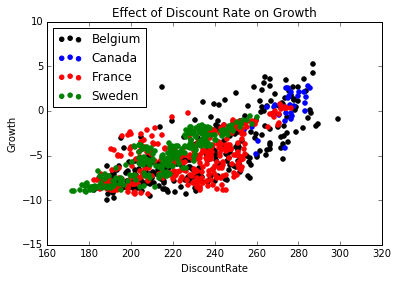

In [13]:
# plot the points on one figure
plt.figure(1)
plt.scatter(COO_Belgium['DiscountRate'],COO_Belgium['Growth'],color='black')
plt.scatter(COO_Canada['DiscountRate'],COO_Canada['Growth'],color='blue')
plt.scatter(COO_France['DiscountRate'],COO_France['Growth'],color='red')
plt.scatter(COO_Sweden['DiscountRate'],COO_Sweden['Growth'],color='green')
plt.ylabel('Growth')
plt.xlabel('DiscountRate')
plt.title('Effect of Discount Rate on Growth')
plt.legend(['Belgium','Canada','France','Sweden'],loc='upper left')
plt.savefig('GrowthPlot',format='pdf')

#### Extra Credit

In [14]:
# interpret data with respective countries
COO_Belgium = COO_0
COO_Canada = COO_2700
COO_France = COO_2762
COO_Sweden = COO_3026

In [15]:
# linear interpolation of HEET data of growth using GDP
interp = interp1d(HEET['GDP'],HEET['Growth'],bounds_error=False)

# interpolate results on country datasets
Growth_Canada = pd.DataFrame(interp(COO_Canada.iloc[:,0]))
Growth_Canada.columns = ['Growth']
COO_Canada = pd.concat((COO_Canada,Growth_Canada),axis=1)
Growth_France = pd.DataFrame(interp(COO_France.iloc[:,0]))
Growth_France.columns = ['Growth']
COO_France = pd.concat((COO_France,Growth_France),axis=1)
Growth_Sweden = pd.DataFrame(interp(COO_Sweden.iloc[:,0]))
Growth_Sweden.columns = ['Growth']
COO_Sweden = pd.concat((COO_Sweden,Growth_Sweden),axis=1)

# view the interpolation data
print(COO_Canada.head())
print(COO_France.head())
print(COO_Sweden.head())

       GDP  Timestamp  DiscountRate    Growth
0  2700.77    391.217         259.5 -1.051273
1  2702.97    392.312         273.6 -1.092545
2  2705.17    393.318         260.7 -0.351818
3  2713.97    396.432         276.3  1.376000
4  2718.37    398.515         277.1  1.574909
       GDP  Timestamp  DiscountRate  Spread    Growth
0  2761.85   413.4980         276.4     1.6  0.320909
1  2762.89   413.9029         271.7     1.2 -0.116545
2  2765.08   414.7694         273.4     1.5 -0.241273
3  2766.18   415.1953         271.8     1.7 -0.561455
4  2767.33   415.6470         274.6     1.8 -0.442727
       GDP  Timestamp  DiscountRate  Spread    Growth
0  3026.58    611.269         257.8     2.1 -1.079455
1  3030.97    616.164         252.6     0.6 -2.217273
2  3036.44    623.109         243.3     2.8 -2.992000
3  3040.87    630.183         204.4     0.9 -8.804000
4  3043.07    635.364         195.0     1.5 -8.816727


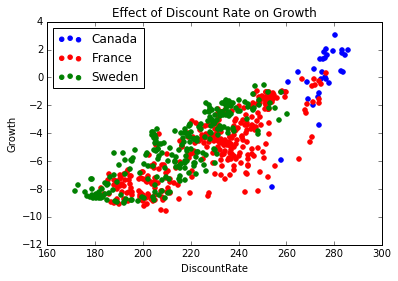

In [16]:
# plot the points on one figure
plt.figure(2)
plt.scatter(COO_Canada['DiscountRate'],COO_Canada['Growth'],color='blue')
plt.scatter(COO_France['DiscountRate'],COO_France['Growth'],color='red')
plt.scatter(COO_Sweden['DiscountRate'],COO_Sweden['Growth'],color='green')
plt.ylabel('Growth')
plt.xlabel('DiscountRate')
plt.title('Effect of Discount Rate on Growth')
plt.legend(['Canada','France','Sweden'],loc='upper left')
plt.savefig('GrowthPlot_GDP',format='pdf')